In [3]:
import tensorflow as tf 
from tensorflow.keras import layers , models
from tensorflow.keras.datasets import mnist , cifar10
from tensorflow.keras.utils import to_categorical
from PIL import Image
import  matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
print("all set!!")

all set!!


In [5]:
##load and preprocess 
(train_images,train_lables) , (test_images,test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step


In [8]:
train_images.shape , train_lables.shape

((60000, 28, 28), (60000,))

In [9]:
train_lables[0:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [10]:
def image_show(train_image,train_label,number):
    plt.imshow(train_image[number])
    plt.title(train_label[number])
    plt.show()

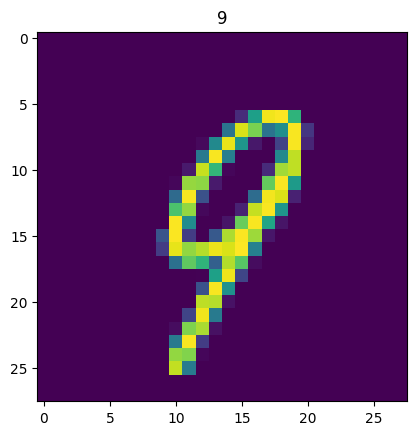

In [13]:
image_show(train_image=train_images,train_label=train_lables,number = 22)

In [15]:
##normalise pixel values to be between 0 and 1 
train_images,test_images = train_images/255.0,test_images/255.0

type(train_images)

numpy.ndarray

In [16]:
##expand dimensions to add a channel (for grey scale images)
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))

In [18]:
train_images[0].shape, test_images.shape

((28, 28, 1), (10000, 28, 28, 1))

In [19]:
##one - hot encode the lables 
train_lables = to_categorical(train_lables)
test_labels = to_categorical(test_labels)

In [21]:
##model define 
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3)))

model.add(layers.Flatten())

model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

##compile the model 

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
##train 
history = model.fit(train_images,
                    train_lables,
                    epochs = 5,
                    batch_size=64,
                    validation_split = 0.2)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.5330 - loss: 1.3176 - val_accuracy: 0.9135 - val_loss: 0.2727
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9214 - loss: 0.2541 - val_accuracy: 0.9500 - val_loss: 0.1604
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9529 - loss: 0.1524 - val_accuracy: 0.9670 - val_loss: 0.1118
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9665 - loss: 0.1099 - val_accuracy: 0.9680 - val_loss: 0.1065
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9696 - loss: 0.0948 - val_accuracy: 0.9709 - val_loss: 0.0968


In [23]:
##evalute the model on the testing data 
test_loss , test_acc = model.evaluate(test_images,test_labels)
print(f"Test Acc : {test_acc*100}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9710 - loss: 0.0905
Test Acc : 97.50999808311462


In [25]:
##predictions 
predictions=model.predict(test_images)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.2806863e-07, 1.0647128e-07, 1.2852735e-04, ..., 9.9985588e-01,
        2.3358057e-08, 2.9619534e-07],
       [1.6857957e-05, 1.0840290e-03, 9.9888736e-01, ..., 4.8971089e-07,
        1.1683711e-06, 2.4063230e-12],
       [3.7406065e-07, 9.9935478e-01, 7.6457663e-06, ..., 4.3220358e-04,
        1.8746023e-05, 1.2442715e-05],
       ...,
       [1.7902830e-09, 2.2405350e-06, 2.4580853e-09, ..., 8.8738401e-05,
        1.9013142e-06, 1.2377512e-03],
       [8.0091704e-06, 1.5474510e-06, 1.6877145e-08, ..., 1.8745877e-07,
        5.8374451e-03, 4.2107166e-07],
       [3.5714584e-05, 1.6813788e-09, 6.0521359e-07, ..., 1.9804667e-11,
        4.4189939e-08, 1.3666131e-08]], dtype=float32)

In [ ]:
np.argmax(predictions,axis = 1)

array([7, 2, 1, ..., 4, 5, 6])